# 1. 导入环境

In [24]:
import omicverse as ov
import pandas as pd
ov.utils.ov_plot_set()

# 2. 加权基因共表达网络分析(WGCNA)
加权基因共表达网络分析(WGCNA)是一种系统生物学方法，用于表征不同样品之间的基因关联模式，可用于鉴定高度协同的基因集，并基于基因集的内生性和基因集与表型之间的关联来鉴定候选生物标志物基因或治疗靶点。目前引用量已超过15,000。但Python中完成WGCNA分析相关的包仍是空白。

In [6]:
import pandas as pd
# 如果出现加载报错，请直接手动下载文件
data=ov.utils.read_csv(filepath_or_buffer='https://github.com/pigudog/cytoscape/blob/main/omicver_rna/LiverFemale3600.csv',
                           index_col=0)
data.head()

gene_symbol  LocusLinkID  ProteomeID cytogeneticLoc  \
substanceBXH                                                          
MMT00000044   1700007N18Rik        69339      286025              0   
MMT00000046           Mast2        17776      157466              0   
MMT00000051         Ankrd32       105377      321939              0   
MMT00000076               0       383154           0              0   
MMT00000080            Ldb2        16826      157383              0   

              CHROMOSOME  StartPosition  EndPosition     F2_2    F2_3  \
substanceBXH                                                            
MMT00000044           16       50911260     50912491 -0.01810  0.0642   
MMT00000046            4      115215318    115372404 -0.07730 -0.0297   
MMT00000051           13       74940309     74982847 -0.02260  0.0617   
MMT00000076           16       49345114     49477048 -0.00924 -0.1450   
MMT00000080            5       43546124     43613704 -0.04870  0.0582   

                 F2_14  ...    F2_324  F2_325  F2_326  F2_327   F2_328  \
substanceBXH            ...                                              
MMT00000044   0.000064  ...  0.047700 -0.0488  0.0168 -0.0309  0.02740   
MMT00000046   0.112000  ... -0.049200 -0.0350 -0.0738 -0.1730 -0.07380   
MMT00000051  -0.129000  ...  0.000612  0.1210  0.0996  0.1090  0.02730   
MMT00000076   0.028700  ... -0.270000  0.0803  0.0424  0.1610  0.05120   
MMT00000080  -0.048300  ...  0.113000 -0.0859 -0.1340  0.0639  0.00731   

              F2_329  F2_330  F2_332  F2_355    F2_357  
substanceBXH                                            
MMT00000044   -0.031  0.0660 -0.0199 -0.0146  0.065000  
MMT00000046   -0.201 -0.0820 -0.0939  0.0192 -0.049900  
MMT00000051    0.120 -0.0629 -0.0395  0.1090  0.000253  
MMT00000076    0.241  0.3890  0.0251 -0.0348  0.114000  
MMT00000080    0.124 -0.0212  0.0870  0.0512  0.024300  

[5 rows x 142 columns]

In [19]:
type(data)

pandas.core.frame.DataFrame

In [21]:
col_name = "gene_symbol"
# 将基因列去重并作为行名
data = data.drop_duplicates(subset='gene_symbol').set_index('gene_symbol')
data.head()

LocusLinkID  ProteomeID cytogeneticLoc  CHROMOSOME  \
gene_symbol                                                         
1700007N18Rik        69339      286025              0          16   
Mast2                17776      157466              0           4   
Ankrd32             105377      321939              0          13   
0                   383154           0              0          16   
Ldb2                 16826      157383              0           5   

               StartPosition  EndPosition     F2_2    F2_3     F2_14   F2_15  \
gene_symbol                                                                    
1700007N18Rik       50911260     50912491 -0.01810  0.0642  0.000064 -0.0580   
Mast2              115215318    115372404 -0.07730 -0.0297  0.112000 -0.0589   
Ankrd32             74940309     74982847 -0.02260  0.0617 -0.129000  0.0871   
0                   49345114     49477048 -0.00924 -0.1450  0.028700 -0.0439   
Ldb2                43546124     43613704 -0.04870  0.0582 -0.048300 -0.0371   

               ...    F2_324  F2_325  F2_326  F2_327   F2_328  F2_329  F2_330  \
gene_symbol    ...                                                              
1700007N18Rik  ...  0.047700 -0.0488  0.0168 -0.0309  0.02740  -0.031  0.0660   
Mast2          ... -0.049200 -0.0350 -0.0738 -0.1730 -0.07380  -0.201 -0.0820   
Ankrd32        ...  0.000612  0.1210  0.0996  0.1090  0.02730   0.120 -0.0629   
0              ... -0.270000  0.0803  0.0424  0.1610  0.05120   0.241  0.3890   
Ldb2           ...  0.113000 -0.0859 -0.1340  0.0639  0.00731   0.124 -0.0212   

               F2_332  F2_355    F2_357  
gene_symbol                              
1700007N18Rik -0.0199 -0.0146  0.065000  
Mast2         -0.0939  0.0192 -0.049900  
Ankrd32       -0.0395  0.1090  0.000253  
0              0.0251 -0.0348  0.114000  
Ldb2           0.0870  0.0512  0.024300  

[5 rows x 141 columns]

In [26]:
# 去掉多余的index相关的列
data = data.iloc[:,6:]
data.head()

F2_2    F2_3     F2_14   F2_15    F2_19     F2_20    F2_23  \
gene_symbol                                                                    
1700007N18Rik -0.01810  0.0642  0.000064 -0.0580  0.04830 -0.151974 -0.00129   
Mast2         -0.07730 -0.0297  0.112000 -0.0589  0.04430 -0.093800  0.09340   
Ankrd32       -0.02260  0.0617 -0.129000  0.0871 -0.11500 -0.065026  0.00249   
0             -0.00924 -0.1450  0.028700 -0.0439  0.00425 -0.236100 -0.06900   
Ldb2          -0.04870  0.0582 -0.048300 -0.0371  0.02510  0.085043  0.04450   

                 F2_24   F2_26    F2_37  ...    F2_324  F2_325  F2_326  \
gene_symbol                              ...                             
1700007N18Rik -0.23600 -0.0307 -0.02610  ...  0.047700 -0.0488  0.0168   
Mast2          0.02690 -0.1330  0.07570  ... -0.049200 -0.0350 -0.0738   
Ankrd32       -0.10200  0.1420 -0.10200  ...  0.000612  0.1210  0.0996   
0              0.01440  0.0363 -0.01820  ... -0.270000  0.0803  0.0424   
Ldb2           0.00167 -0.0680  0.00567  ...  0.113000 -0.0859 -0.1340   

               F2_327   F2_328  F2_329  F2_330  F2_332  F2_355    F2_357  
gene_symbol                                                               
1700007N18Rik -0.0309  0.02740  -0.031  0.0660 -0.0199 -0.0146  0.065000  
Mast2         -0.1730 -0.07380  -0.201 -0.0820 -0.0939  0.0192 -0.049900  
Ankrd32        0.1090  0.02730   0.120 -0.0629 -0.0395  0.1090  0.000253  
0              0.1610  0.05120   0.241  0.3890  0.0251 -0.0348  0.114000  
Ldb2           0.0639  0.00731   0.124 -0.0212  0.0870  0.0512  0.024300  

[5 rows x 135 columns]

In [27]:
# WGCNA的第一步analysis_meta_correlation是计算基因间的相关性矩阵，这里我们采用皮尔森系数的计算方法，来完成基因间的直接相关性矩阵计算。
gene_wgcna=ov.bulk.pyWGCNA(data,save_path='result')
# 会输出一个基因与基因的相关性矩阵
gene_wgcna.calculate_correlation_direct(method='pearson',save=True)

...correlation coefficient matrix is being calculated
...direction correlation have been saved


...indirect correlation matrix is being calculated
...soft_threshold is being calculated
...appropriate soft_thresholds: 8


beta        r2       meank
1      1  0.031363  699.746783
2      2  0.210213  300.086882
3      3  0.412305  170.818425
4      4  0.623761  115.763689
5      5  0.737525   88.565034
6      6  0.774016   74.183139
7      7  0.816521   66.704924
8      8  0.867981   63.523892
9      9  0.934307   63.445197
10    10  0.959852   65.973726
11    11  0.970592   71.024765

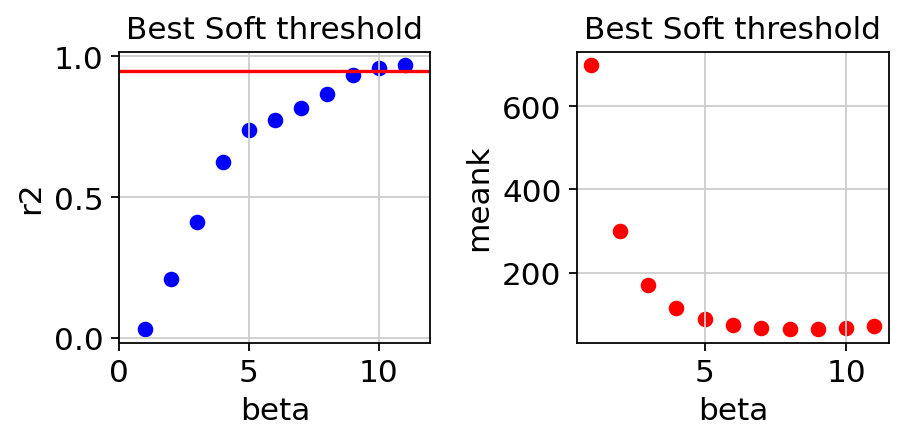

In [29]:
# 在 pyWGCNA 模块中，我们需要将直接相关矩阵转换为间接相关矩阵来计算软阈值，软阈值可以帮助我们将原来的相关网络转换为无尺度网络
gene_wgcna.calculate_correlation_indirect(save=False)
gene_wgcna.calculate_soft_threshold(save=False)

左边的垂直坐标是无尺度网络的评估指标r^2。R2越接近1，网络就越接近无尺度网络，通常需要r^2> 0.8或0.9。右侧垂直坐标为平均连通度，随 β 值的增加而减小。将这两个图结合起来，通常选择 r^2首次达到0.8或0.9或更高时的 β 值。利用 β 值，我们可以根据方程将相关矩阵转换成邻接矩阵。

In [30]:
# 然后我们构造拓扑重叠矩阵
gene_wgcna.calculate_corr_matrix()

...distance have being calculated
...geneTree have being calculated
...dynamicMods have being calculated
..cutHeight not given, setting it to 343.31256903199113  ===>  99% of the (truncated) height range in dendro.
..done.
...total: 18


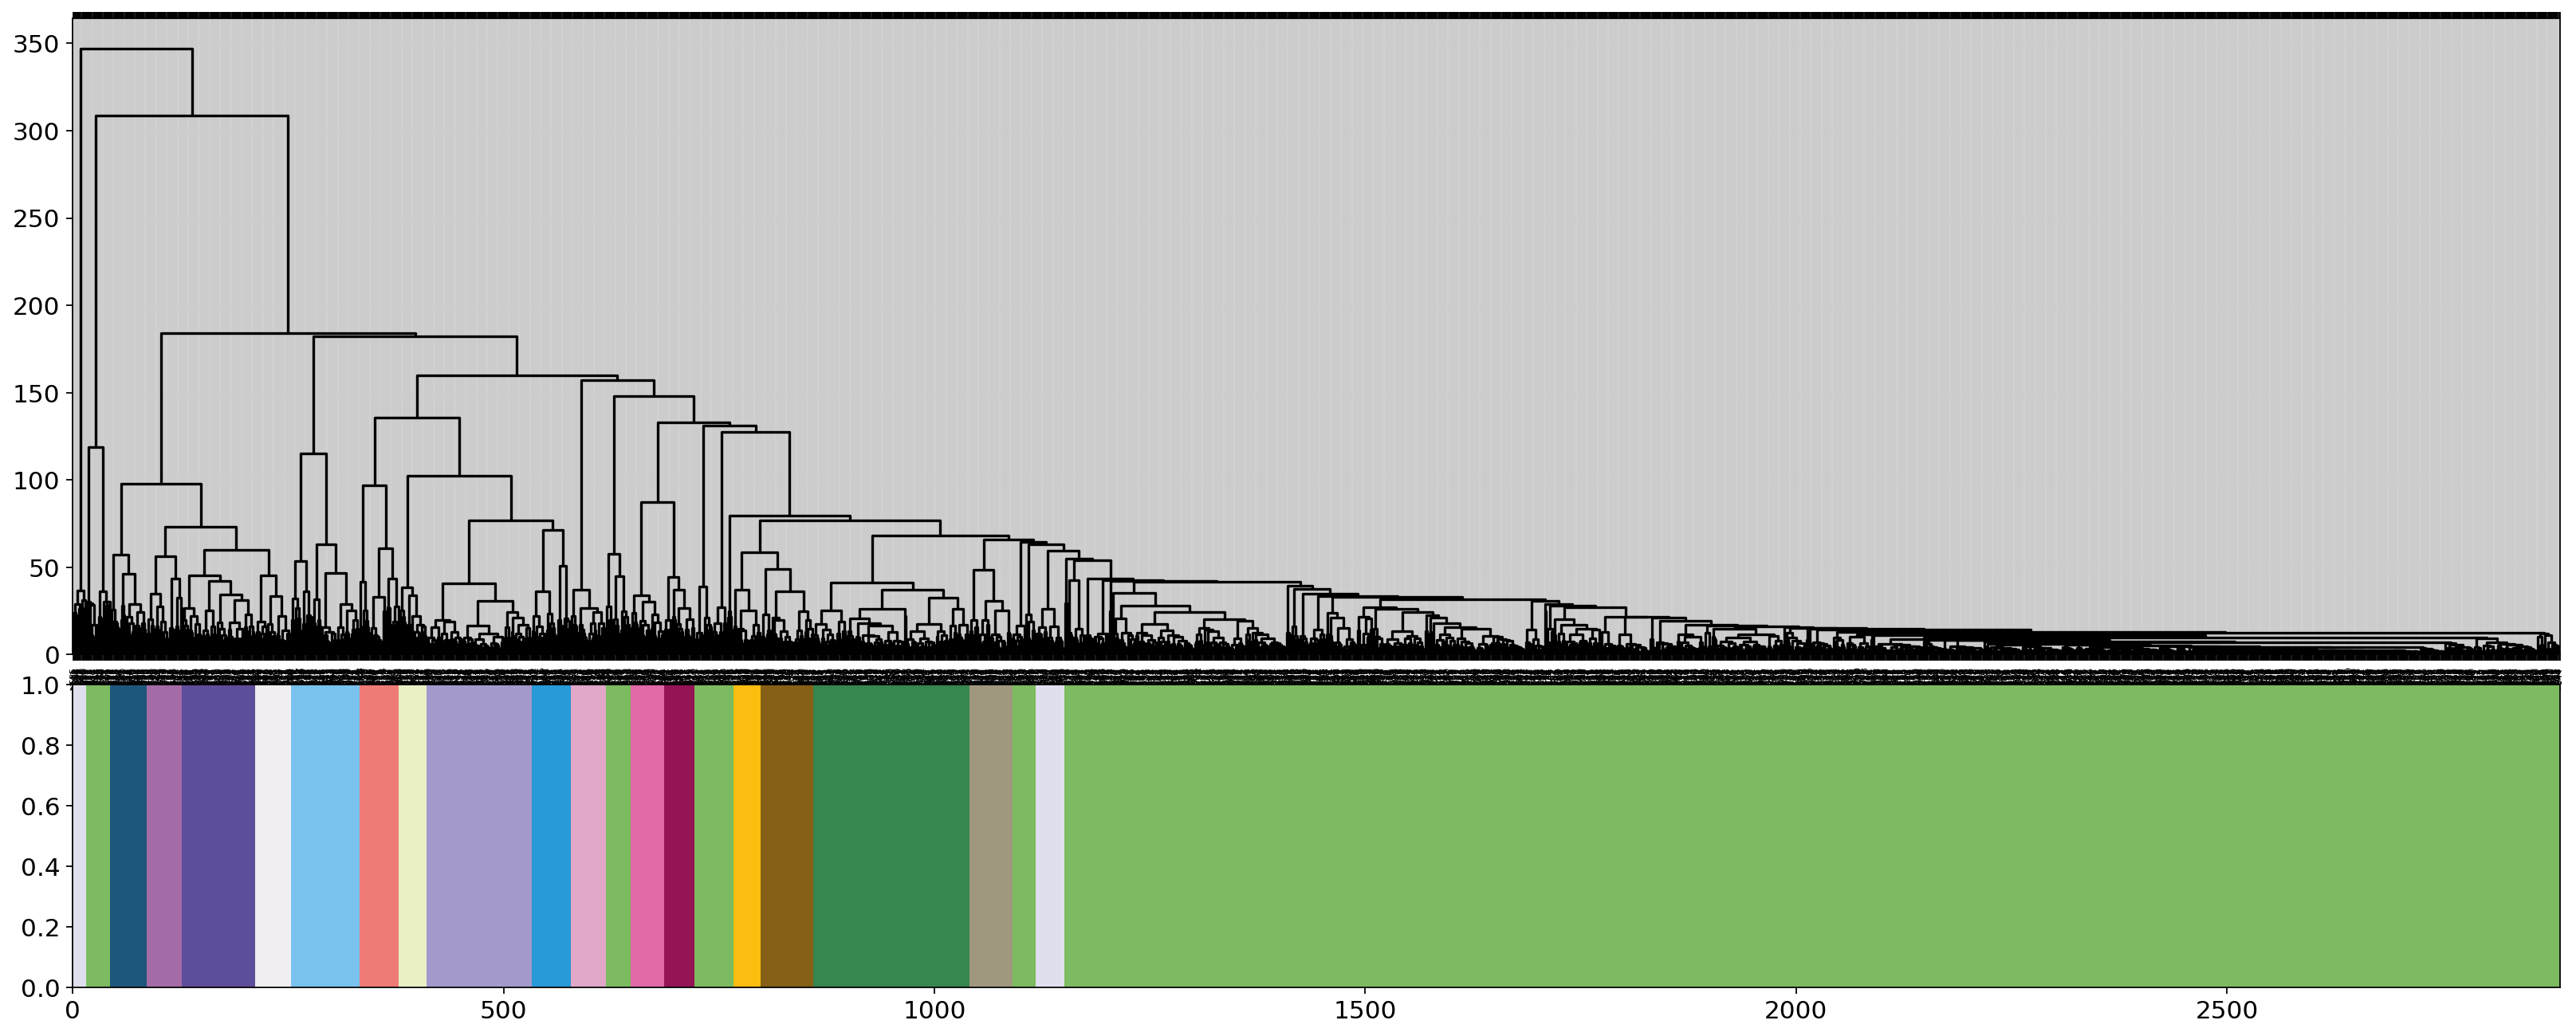

In [31]:
# 在获得基因间的拓扑重叠矩阵后，我们使用动态剪切树的方式来寻找基因间的模块。在这里，我们使用WGCNA作者发表的DynamicTree的算法来实现此功能。
gene_wgcna.calculate_distance()
gene_wgcna.calculate_geneTree()
gene_wgcna.calculate_dynamicMods()
module=gene_wgcna.calculate_gene_module()

In [32]:
# 在这里，我们成功地计算了每个基因的模块，共有18个模块，它们的颜色都显示在图中。我们使用.head()查看每个基因所属的模块。
module.head()

ivl  module   name    color
0   585       8  Il1rn  #E0DFED
1  1741       8  Moap1  #E0DFED
2  2389       8  Bicd2  #E0DFED
3  2061       8   Ilf2  #E0DFED
4   538       8  Bing4  #E0DFED

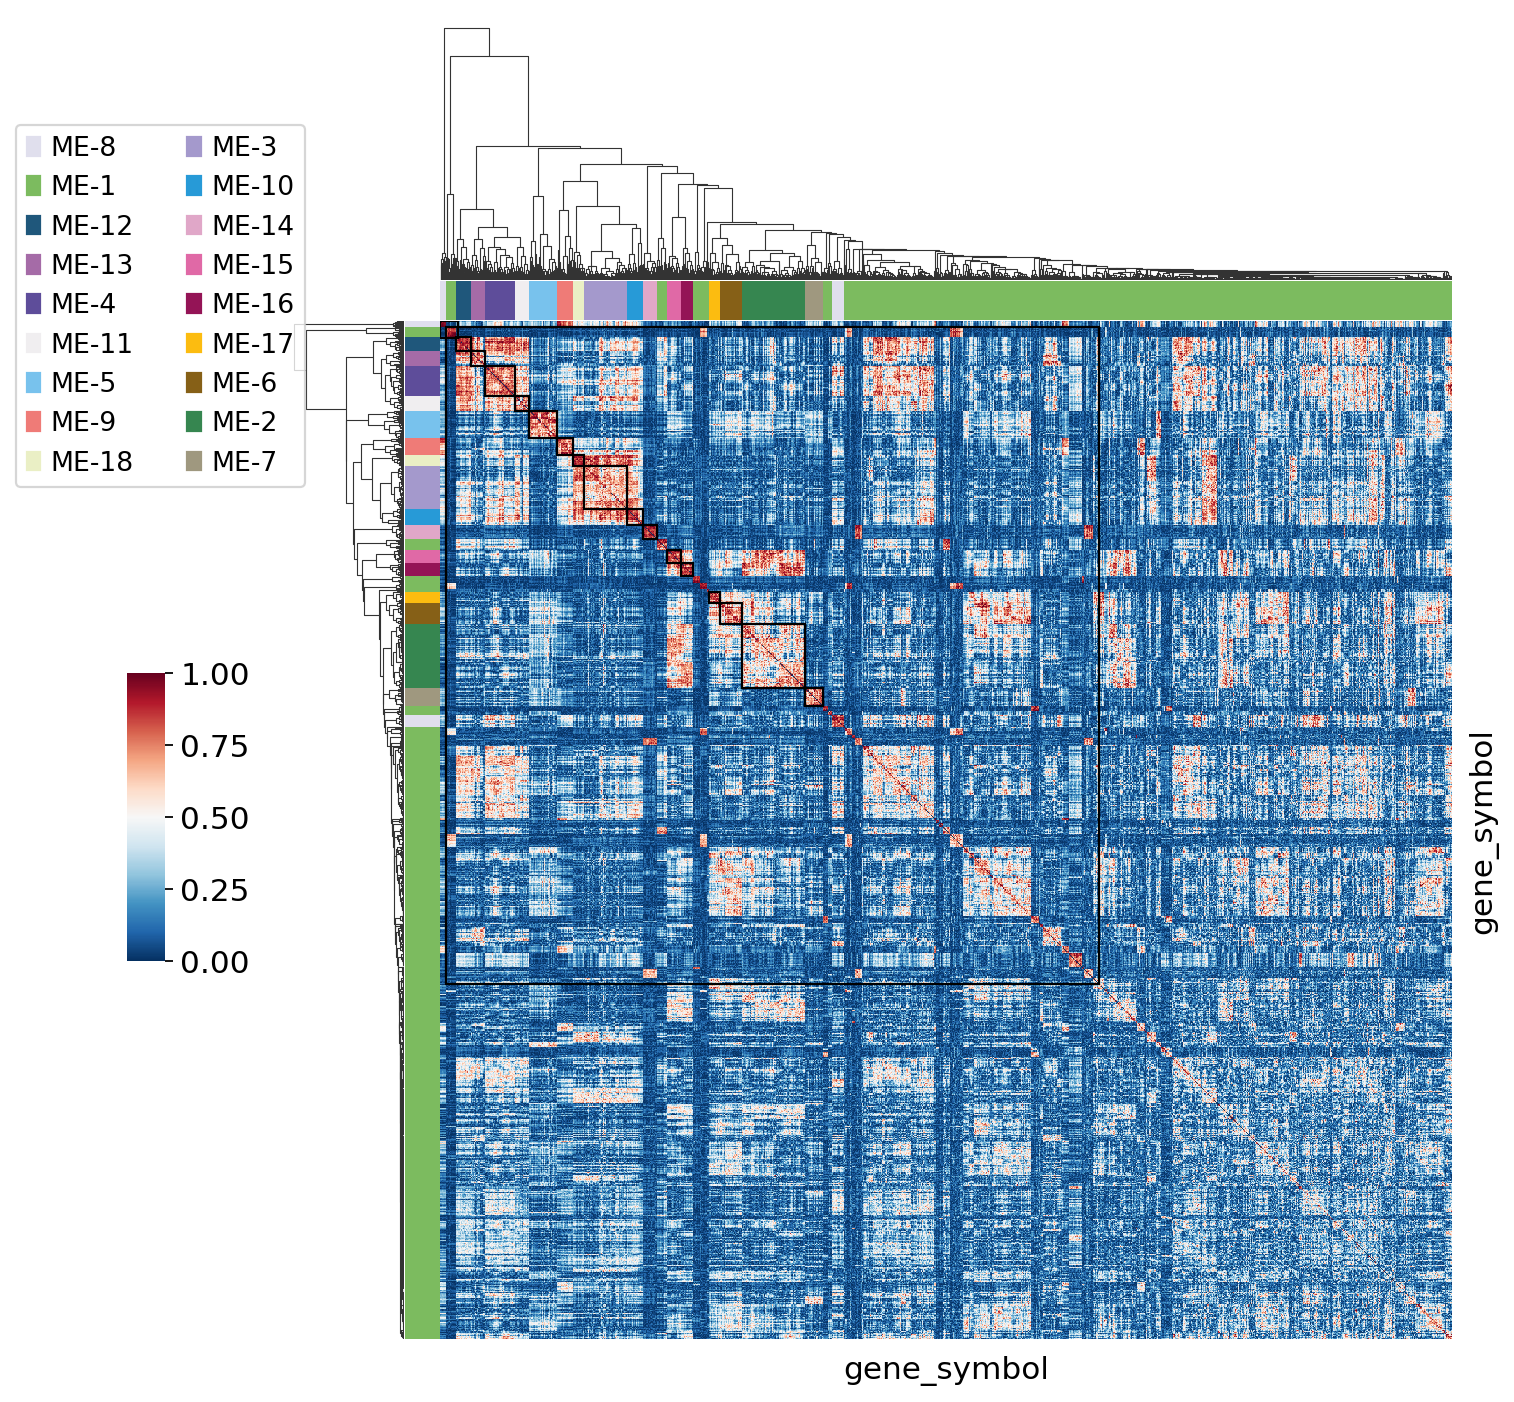

In [33]:
# 我们还可以使用.plot_matrix()来可视化拓扑重叠矩阵与模块之间的关系。
gene_wgcna.plot_matrix()

In [41]:
# 有时候我们对一个基因或一个通路的模块感兴趣，我们需要提取基因的子模块进行分析和定位。例如，我们选择了两个模块3,18作为分析的子模块
gene_wgcna.get_sub_module([3,18]).shape

(154, 4)

In [56]:
# 我们发现模块3,18共有154个基因。接下来，我们使用之前构建的无尺度网络，将阈值设置为0.95，为模块3构建一个基因相关网络图
sub_G=gene_wgcna.get_sub_network([3,18],correlation_threshold=0.95)
sub_G

(<Figure size 960x960 with 1 Axes>, <AxesSubplot: >)

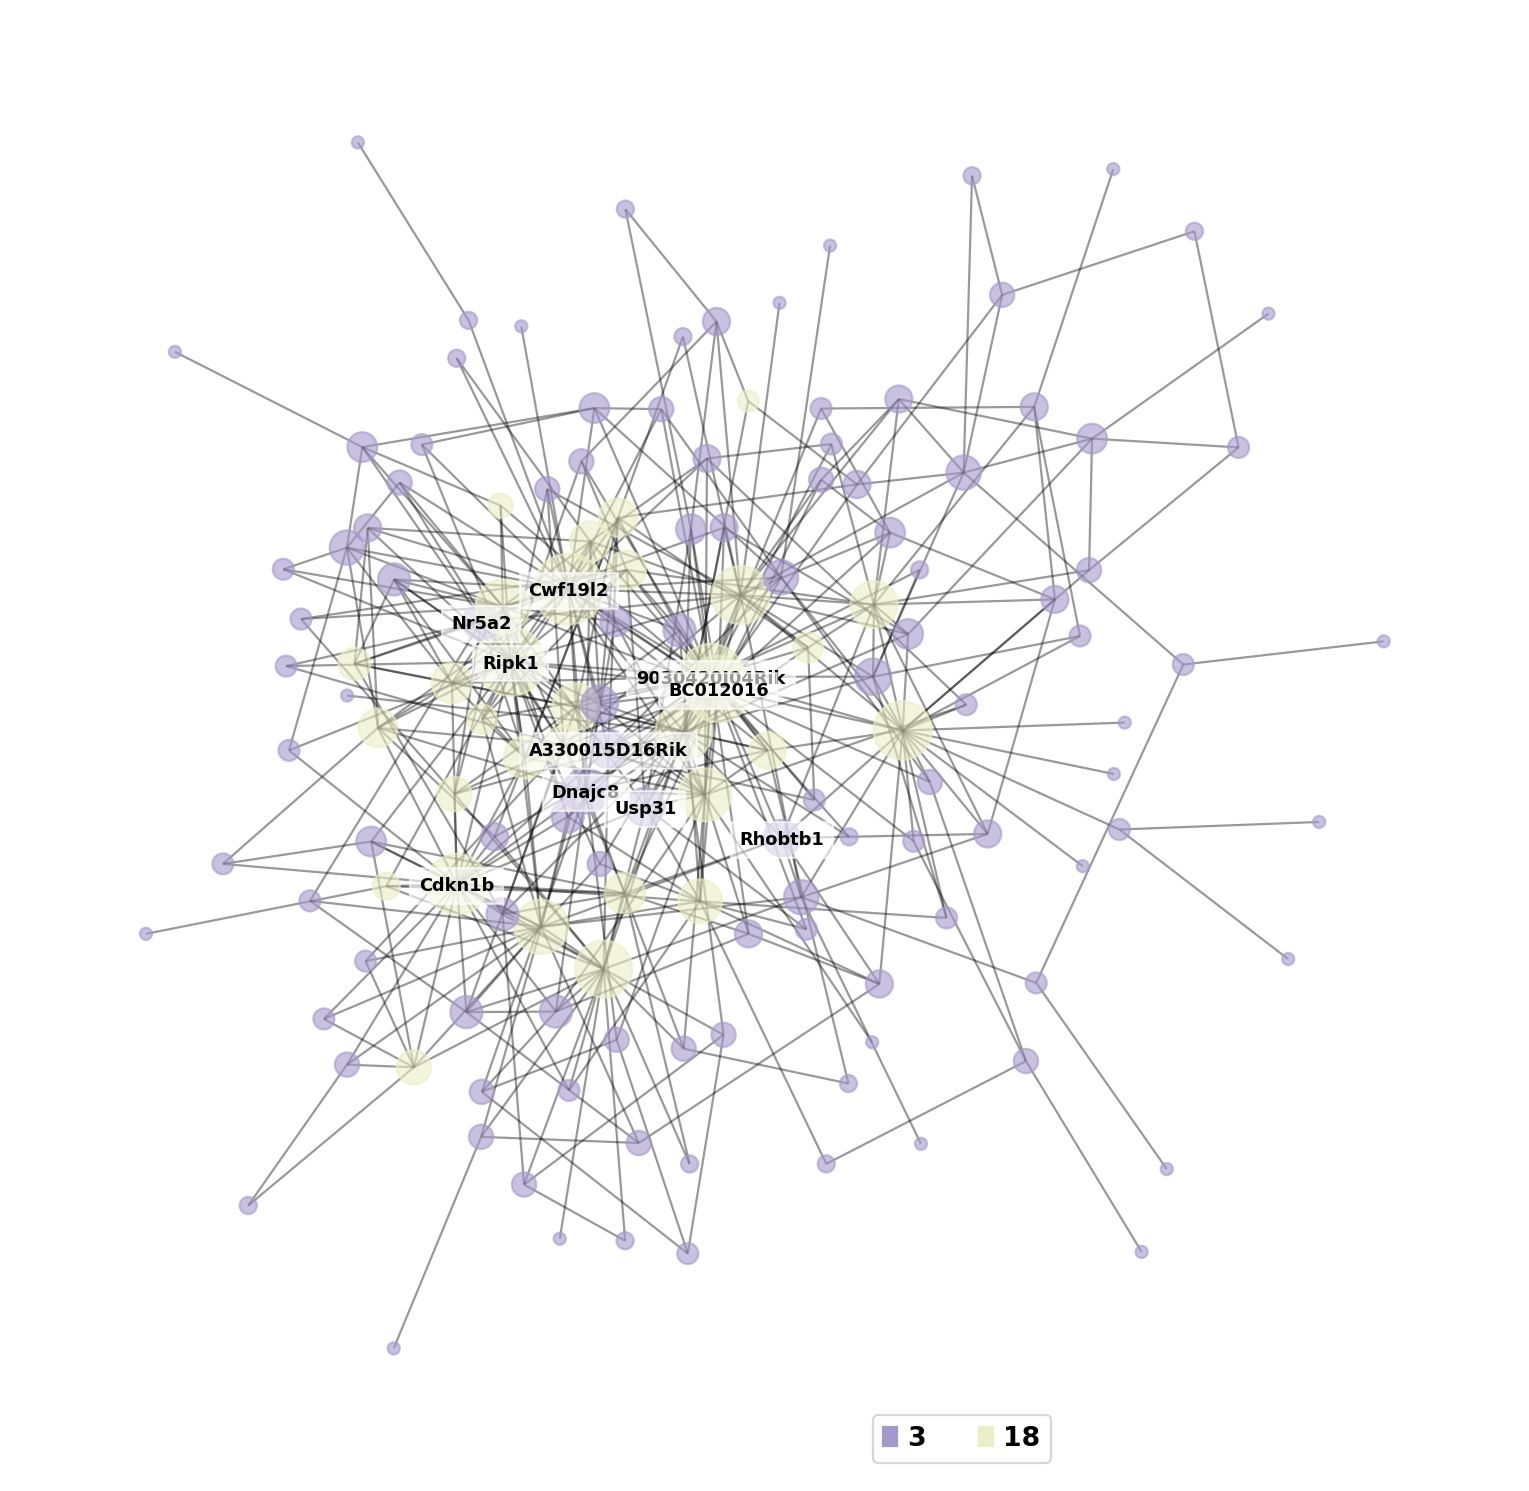

In [62]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
# pyWGCNA 提供了一个简单的可视化函数 plot_sub_network 来可视化我们感兴趣的基因相关性网络。
gene_wgcna.plot_sub_network([3,18],pos_type='kamada_kawai',pos_scale=5,pos_dim=2,
                         figsize=(12,12),node_size=30,label_fontsize=8,
                        label_bbox={"ec": "white", "fc": "white", "alpha": 0.6})

# 3. 蛋白质互作网络分析
我们接下来介绍蛋白质互作网络的分析，STRING 是一个已知和预测的蛋白质-蛋白质相互作用的数据库。这种相互作用包括直接的(物理的)和间接的(功能的)关联; 它们来源于计算预测，来源于生物体之间的知识转移，以及来自其他(主要的)数据库的相互作用。

在这里，我们制作了一个教程，使用omicverse来构建蛋白质-蛋白质相互作用网络。

使用omicverse完成蛋白质相互作用网络分析需要三个数据：蛋白列表,蛋白类别字典和蛋白颜色字典，颜色字典是绘图时的每个蛋白的颜色，一般与类别字典相同。在这里我们随机生成一个颜色字典和类别字典。

In [70]:
gene_list=['FAA4','POX1','FAT1','FAS2','FAS1','FAA1','OLE1','YJU3','TGL3','INA1','TGL5']
gene_type_dict=dict(zip(gene_list,['Type1']*5+['Type2']*6))
gene_color_dict=dict(zip(gene_list,['#F7828A']*5+['#9CCCA4']*6))
gene_type_dict

{'FAA4': 'Type1',
 'POX1': 'Type1',
 'FAT1': 'Type1',
 'FAS2': 'Type1',
 'FAS1': 'Type1',
 'FAA1': 'Type2',
 'OLE1': 'Type2',
 'YJU3': 'Type2',
 'TGL3': 'Type2',
 'INA1': 'Type2',
 'TGL5': 'Type2'}

In [71]:
# omicverse提供了一个十分简单的APIov.bulk.string_interaction，只需要输入蛋白列表即可完成相互作用关系的预测。
G_res=ov.bulk.string_interaction(gene_list,4932)
G_res.head()

stringId_A    stringId_B preferredName_A preferredName_B ncbiTaxonId  \
0  4932.YBR041W  4932.YKL182W            FAT1            FAS1        4932   
1  4932.YBR041W  4932.YKL182W            FAT1            FAS1        4932   
2  4932.YBR041W  4932.YOR081C            FAT1            TGL5        4932   
3  4932.YBR041W  4932.YOR081C            FAT1            TGL5        4932   
4  4932.YBR041W  4932.YPL231W            FAT1            FAS2        4932   

   score nscore fscore pscore ascore escore dscore tscore  
0  0.576      0      0      0  0.121      0      0  0.538  
1  0.576      0      0      0  0.121      0      0  0.538  
2  0.601      0      0      0      0      0      0  0.601  
3  0.601      0      0      0      0      0      0  0.601  
4   0.63      0      0      0  0.113      0      0    0.6

具体含义：
![PPI](PPI_ref.png)

In [73]:
# 当然，omicverse还有非常漂亮的可视化函数，来可视化蛋白质相互作用网络，在这里，我们需要使用pyPPI类来完成上述分析
#4932代表酵母，人类一般是9606，小鼠一般是10090
ppi=ov.bulk.pyPPI(gene=gene_list,
                      gene_type_dict=gene_type_dict,
                      gene_color_dict=gene_color_dict,
                      species=4932)

In [74]:
# 然后我们连接到 string-db 来计算蛋白质-蛋白质的相互作用

ppi.interaction_analysis()

(<Figure size 320x320 with 1 Axes>, <AxesSubplot: >)

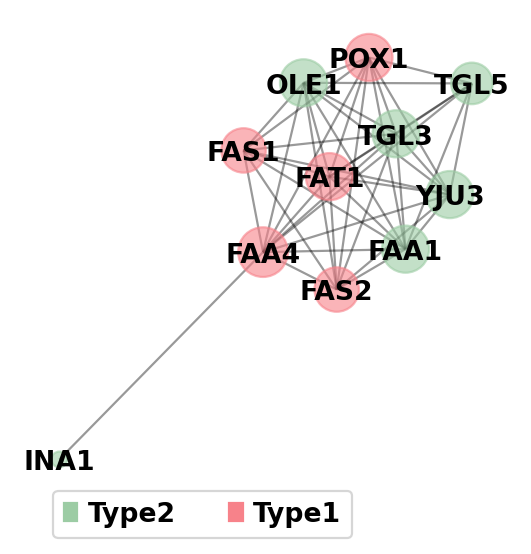

In [75]:
# 我们提供了.plot_network()来可视化蛋白质相互作用网络，更多的参数您可以使用help(ov.utils.plot_network)来寻找。
ppi.plot_network()